In [131]:
import pandas as pd

def csv_to_data(csv_file):
  df=pd.read_csv(csv_file,header=0)
  feature_names = list(df.columns.values)
  data = df.values
  return feature_names, data

In [132]:
feature_names, data = csv_to_data('data.csv')

In [133]:
print(data)

[[21.  27.2 15.9 ...  0.  58.8 41. ]
 [20.7 26.  15.8 ...  0.5 64.4 39. ]
 [18.3 19.6 17.1 ...  2.  90.4 82. ]
 ...
 [14.6 20.6 10.5 ...  0.  55.9 36. ]
 [13.8 18.  11.  ...  0.  62.4 48. ]
 [14.1 20.3  9.2 ...  0.7 73.3 46. ]]


In [134]:
print(feature_names)

['평균기온(℃)', '최고기온(℃)', '최저기온(℃)', '강수량(mm)', '1시간최다강수량(mm)', '평균습도(%rh)', '최저습도(%rh)']


In [135]:
print(data.shape)

(1262, 7)


In [136]:
def csv_to_target(csv_file):
  df=pd.read_csv(csv_file, header = 0)
  target_names = list(df.columns.values)
  target = df.values
  return target_names, target

In [137]:
target_names, target = csv_to_target("target.csv")

In [138]:
print(target)

[[2783]
 [2729]
 [2998]
 ...
 [ 765]
 [ 829]
 [ 745]]


In [139]:
print(target.shape)

(1262, 1)


In [140]:
print(target_names)

['모기포집량(개)']


각 피처의 데이터 크기에 따른 상대적 영향력의 차이를 제거하기 위해 피쳐의 크기를 비슷한 수준으로 맞춰준다.

In [141]:
data=pd.DataFrame(data, columns = feature_names)
target=pd.DataFrame(target, columns = target_names)

print(data.shape)
print(target.shape)

(1262, 7)
(1262, 1)


In [142]:
df= pd.concat([data, target], axis=1)
df.head(5)

,평균기온(℃),최고기온(℃),최저기온(℃),강수량(mm),1시간최다강수량(mm),평균습도(%rh),최저습도(%rh),모기포집량(개)
0,21.0,27.2,15.9,0.0,0.0,58.8,41.0,2783
1,20.7,26.0,15.8,0.5,0.5,64.4,39.0,2729
2,18.3,19.6,17.1,3.5,2.0,90.4,82.0,2998
3,16.1,20.1,12.5,0.0,0.0,45.9,13.0,3392
4,14.2,19.9,8.3,0.0,0.0,37.9,16.0,3137


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52572 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44256 missing from current font.
  font.set_

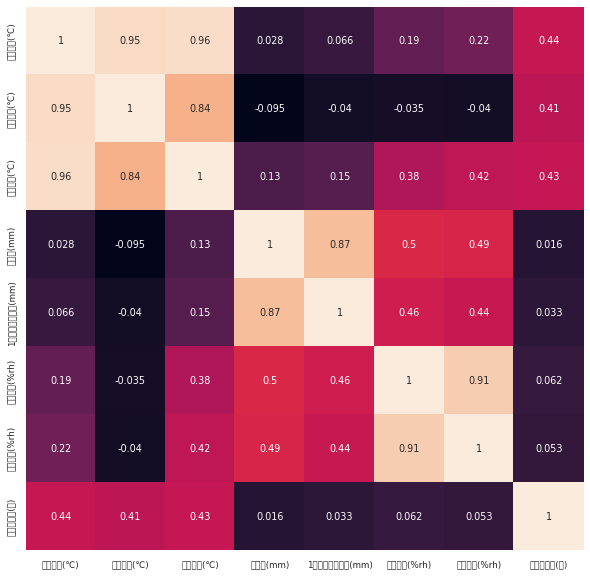

In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_corr=df.corr()

plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [144]:
corr_order=df.corr().loc[:'최저습도(%rh)','모기포집량(개)'].abs().sort_values(ascending=False)
corr_order

평균기온(℃)         0.435460
최저기온(℃)         0.431892
최고기온(℃)         0.414240
평균습도(%rh)       0.061762
최저습도(%rh)       0.053067
1시간최다강수량(mm)    0.033404
강수량(mm)         0.015892
Name: 모기포집량(개), dtype: float64

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_scaled=df.iloc[:, :-1]   #마지막열임을 나타내는 -1은 포함하지 않음
scaler.fit(df_scaled)
df_scaled=scaler.transform(df_scaled)

#스케일링 변환된 값을 데이터프레임에 반영
df.iloc[:, :-1]=df_scaled[:, :]
df.head()

,평균기온(℃),최고기온(℃),최저기온(℃),강수량(mm),1시간최다강수량(mm),평균습도(%rh),최저습도(%rh),모기포집량(개)
0,0.551237,0.605096,0.513514,0.000000,0.000000,0.471063,0.390805,2783
1,0.540636,0.566879,0.510135,0.003460,0.007610,0.546433,0.367816,2729
2,0.455830,0.363057,0.554054,0.024221,0.030441,0.896366,0.862069,2998
3,0.378092,0.378981,0.398649,0.000000,0.000000,0.297443,0.068966,3392
4,0.310954,0.372611,0.256757,0.000000,0.000000,0.189771,0.103448,3137


In [146]:
from sklearn.model_selection import train_test_split
x_data=df.loc[:, :'최저습도(%rh)']
y_data=df.loc[:, '모기포집량(개)']
x_train, x_test, y_train, y_test=train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(1009, 7) (1009,)
(253, 7) (253,)


In [147]:
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train ,y_train)
y_preds = lr.predict(x_test)

print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Variance score : 0.325


In [148]:
from sklearn.svm import SVR

svm_poly_reg=SVR(kernel='poly',degree=2,C=100,epsilon=0.1)
svm_poly_reg.fit(x_train, y_train)
y_preds= svm_poly_reg.predict(x_test)

print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Variance score : 0.217


In [149]:
from sklearn.neural_network import MLPRegressor

model = MLPRegressor(hidden_layer_sizes=(64, 64),
                     activation='relu', solver='adam',
                     learning_rate='constant', learning_rate_init=0.01,
                     max_iter=1000, batch_size=64, random_state=42)

model.fit(x_train, y_train)
y_preds= model.predict(x_test)

print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Variance score : 0.299
